<a href="https://colab.research.google.com/github/nishmanair/Fake-new-detection/blob/main/Internship_Fake_New_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [18]:
true_data = pd.read_csv('True.csv')

In [19]:
fake_data = pd.read_csv('Fake.csv')

In [20]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [21]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [22]:
true_data['Target']=['True']*len(true_data)
fake_data['Target']=['Fake']*len(fake_data)

In [23]:
data=true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])

In [27]:
data['label']=pd.get_dummies(data.Target)['Fake']

In [28]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=data['Target'])

In [29]:
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

Text(0, 0.5, 'Number of texts')

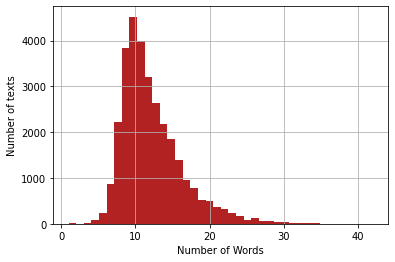

In [31]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Target   44898 non-null  object
 5   label    44898 non-null  uint8 
dtypes: object(5), uint8(1)
memory usage: 1.8+ MB


In [35]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,Target,label
0,WATCH: CNN Host Chris Cuomo Just Called Trump...,It s about time the media started calling out ...,News,Fake,1
1,DEAD BROKE HILLARY Buys Million Dollar “Mother...,The 2014 IRS filings for the Clinton Foundatio...,politics,Fake,1
2,Indonesia foreign minister flies to Bangladesh...,DHAKA (Reuters) - Indonesia s foreign minister...,worldnews,True,0
3,WATCH: White Trump Voter Tells Fox That Presi...,These deplorable people are just incapable of ...,News,Fake,1
4,LOL! HYPOCRITE HILLARY Gives Speech On Evils O...,Fat ass fraud in a pants suit When Hillary Cli...,politics,Fake,1


In [36]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,Target,label
0,It s about time the media started calling out ...,News,Fake,1
1,The 2014 IRS filings for the Clinton Foundatio...,politics,Fake,1
2,DHAKA (Reuters) - Indonesia s foreign minister...,worldnews,True,0
3,These deplorable people are just incapable of ...,News,Fake,1
4,Fat ass fraud in a pants suit When Hillary Cli...,politics,Fake,1


In [37]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,Target,label
0,it s about time the media started calling out ...,News,Fake,1
1,the 2014 irs filings for the clinton foundatio...,politics,Fake,1
2,dhaka (reuters) - indonesia s foreign minister...,worldnews,True,0
3,these deplorable people are just incapable of ...,News,Fake,1
4,fat ass fraud in a pants suit when hillary cli...,politics,Fake,1


In [38]:

# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [39]:
# Check
data.head()

,text,subject,Target,label
0,it s about time the media started calling out ...,News,Fake,1
1,the 2014 irs filings for the clinton foundatio...,politics,Fake,1
2,dhaka reuters indonesia s foreign minister wi...,worldnews,True,0
3,these deplorable people are just incapable of ...,News,Fake,1
4,fat ass fraud in a pants suit when hillary cli...,politics,Fake,1


In [40]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
data.head()

,text,subject,Target,label
0,time media started calling trump team liars ar...,News,Fake,1
1,2014 irs filings clinton foundation recently r...,politics,Fake,1
2,dhaka reuters indonesia foreign minister fly b...,worldnews,True,0
3,deplorable people incapable taking personal re...,News,Fake,1
4,fat ass fraud pants suit hillary clinton new y...,politics,Fake,1


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


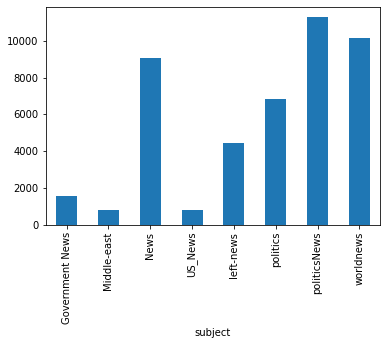

In [42]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [49]:
# !pip install wordcloud

In [51]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [54]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [56]:
X_train.head()

NameError: ignored

In [57]:
y_train.head()

NameError: ignored

In [58]:

from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

NameError: ignored

In [59]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

NameError: ignored